# Librerias A Utilizar

## Tratamiento de datos

In [57]:
##
## 2021-02-20
## Carlos E. Grajales
##

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


## Graficos

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


## Preprocesado y modelado

In [4]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


## Otros

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Fuente de Datos 

Esta fuente de datos traida sacada desde la siguiente direccion https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ contiene datos sobre descripcion y componentes de una vivienda asociada con sus precios 

### Explorando los datos

Se realiza exploracion de los datos para obtener tipos de datos, cantidades, campos nulos y demas, el objetivo de esta exploración es tomar desiciones sobre los tipos de datos mas relevantes del la data entregada.

In [27]:
TRAIN = pd.read_csv("/home/cgrajales/algoritmos/train.csv")
TRAIN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
TRAIN.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Se sabe que la data esta compuesto por 1460 filas y 81 columnas, con esta informacion se realiza un descripcion general de la data para obtener promedios, desviacion estandar, maximos, minimos de los valores numericos y darnos un mejor acercamento a la data en general.

In [8]:
TRAIN.drop(['Id'], axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
TRAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
##Eliminando primera columna
TRAIN.drop("Id",1,inplace=True)

In [10]:
TRAIN
filas=TRAIN.shape[0]
columnas=TRAIN.shape[1]


### Buscando los variables con registros vacios

Se realiza un exploracion columna a columna de la data para encontrar valores nulos y poder observar informacion sobre la calidad de la data de los mismos, se encuentran algunas columnas que poseen un alto porcentaje de valores en nulo y que probablemente de ser usadas agregarian ruido al modelo

In [11]:
nullsum = pd.DataFrame()
nullsumpor = pd.DataFrame()
x = []
y = []
z = []
for columna in TRAIN.columns:
    x.append(columna)
    y.append(TRAIN[columna].isnull().sum())
    z.append(TRAIN[columna].isnull().sum()*100/filas)

nullsum['columna'] = x
nullsum['valoresnulos'] = y

nullsumpor['columna'] = x
nullsumpor['valoresnulos'] = z



Mostrando columnas y cantidades con valores nulos

In [12]:
nullsum.sort_values('valoresnulos',inplace=True,ascending=False)
nullsum[nullsum['valoresnulos']>0]

,columna,valoresnulos
71,PoolQC,1453
73,MiscFeature,1406
5,Alley,1369
72,Fence,1179
56,FireplaceQu,690
2,LotFrontage,259
58,GarageYrBlt,81
63,GarageCond,81
57,GarageType,81
59,GarageFinish,81


Porcentaje de los valores nulos con base en la totalidad de los datos de cada columna

In [13]:
nullsumpor.sort_values('valoresnulos',inplace=True,ascending=False)
nullsumpor[nullsumpor['valoresnulos']>0]

,columna,valoresnulos
71,PoolQC,99.520548
73,MiscFeature,96.301370
5,Alley,93.767123
72,Fence,80.753425
56,FireplaceQu,47.260274
2,LotFrontage,17.739726
58,GarageYrBlt,5.547945
63,GarageCond,5.547945
57,GarageType,5.547945
59,GarageFinish,5.547945


Revisando el comportamiento de los valores nulos y que afectarian el modelo mediante una grafica

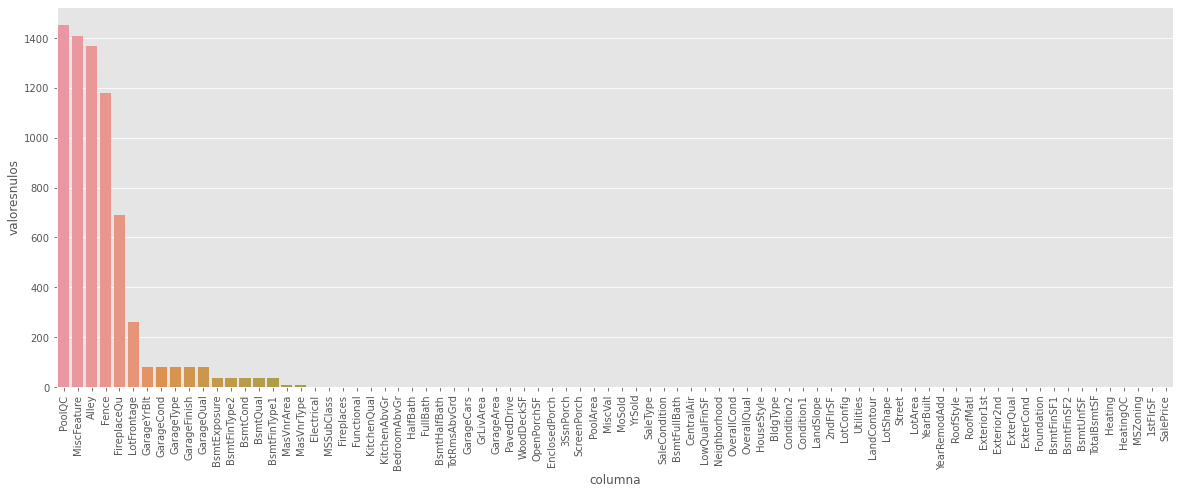

In [14]:

fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(x='columna',y='valoresnulos',data=nullsum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Grafica a nivel de porcentajes de nulos.

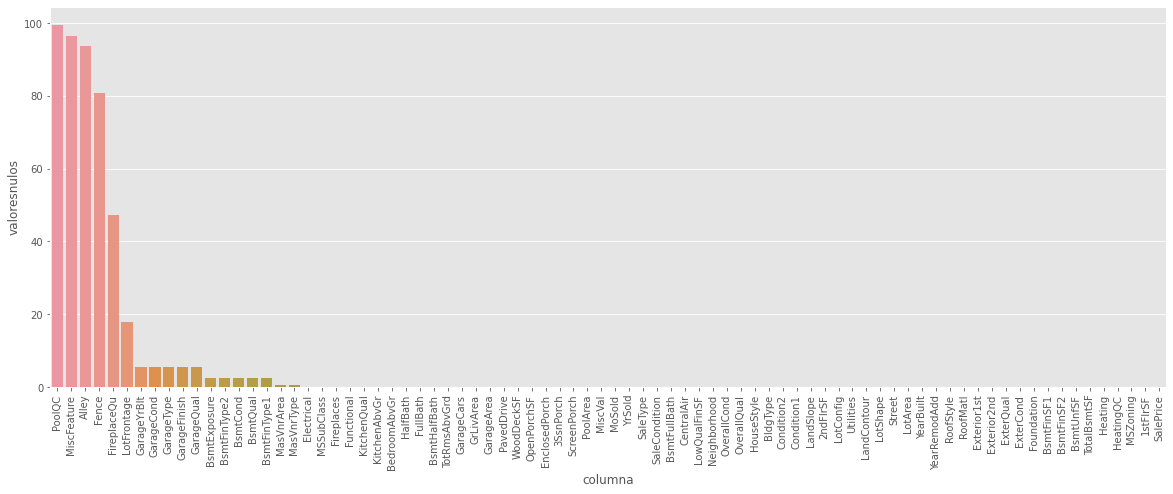

In [15]:
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(x='columna',y='valoresnulos',data=nullsumpor)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Revisando los valores, y cantidades considero que las columnas:

- **PoolQC** 99.520548%
- **MiscFeature**	96.301370%
- **Alley**	93.767123%
- **Fence**	80.753425%
- **FireplaceQu**	47.260274%

Contienen valores nulos que agregarian mucho ruido al modelo en caso de ser tenidas en cuenta puesto que no aportan mucho valor 


In [28]:
null_cols = []
for feature in TRAIN.drop("SalePrice",1).columns:
    if TRAIN[feature].isnull().sum() > 0:
        print(feature)
        null_cols.append(feature)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Analyzando las columnas que tienen valores nulos para saber de que tipo y cantidades son

In [29]:
objs = []
for col in null_cols:
    print("Inspeccionando Columna:",col)
    print("Cantidad de Valores Nulos:", TRAIN[col].isnull().sum())
    print("Valores distintos :")
    print(TRAIN[col].value_counts(),"\n")
    
    
    # creat a list of object type variables    
    if TRAIN[col].dtype == "object":
        objs.append(col)


Inspeccionando Columna: LotFrontage
Cantidad de Valores Nulos: 259
Valores distintos :
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64 

Inspeccionando Columna: Alley
Cantidad de Valores Nulos: 1369
Valores distintos :
Grvl    50
Pave    41
Name: Alley, dtype: int64 

Inspeccionando Columna: MasVnrType
Cantidad de Valores Nulos: 8
Valores distintos :
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

Inspeccionando Columna: MasVnrArea
Cantidad de Valores Nulos: 8
Valores distintos :
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64 

Inspeccionando Columna: BsmtQual
Cantidad de Valores Nulos: 37
Valores distintos :
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dt

Analizando los campos vacios y su correlacion con respecto a SalesPrice los valores son bajos (no hay correlaciones >0.5), por lo que sacarlos del modelo no afectaria 

In [30]:
TRAIN.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [31]:
sales_price = TRAIN['SalePrice']
data = TRAIN
Total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Eliminando columnas con mas del 20% de valores nulos

In [32]:
data.drop((missing_data[missing_data['Total'] > 20]).index, axis=1, inplace=True)
print(data.isnull().sum().max())

8


In [33]:
### Reemplazando columnas numericas vacias

numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars','MasVnrArea']

for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
    
### Reemplazando columnas categoricas vacias
    
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual','MasVnrType']

for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])
    
##Verificando si existen nulos    
data.isnull().sum().max()


0

In [34]:
TRAIN=data

### Generando Valores promedio y dispersion de variables

In [35]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
TRAIN.mean(axis=0)

----------------------
Media de cada variable
----------------------


Id                  730.500000
MSSubClass           56.897260
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.117123
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPorch          15.060959
PoolArea              2.758904
MiscVal 

In [36]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
TRAIN.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Id               1.777550e+05
MSSubClass       1.789338e+03
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.266383e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
MoSold    

### Generando información sobre la correlacion de la data

In [37]:
TRAIN.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Graficando la correlacion con mapas de calor para identificar visualmente las variables con mas alta correlacion

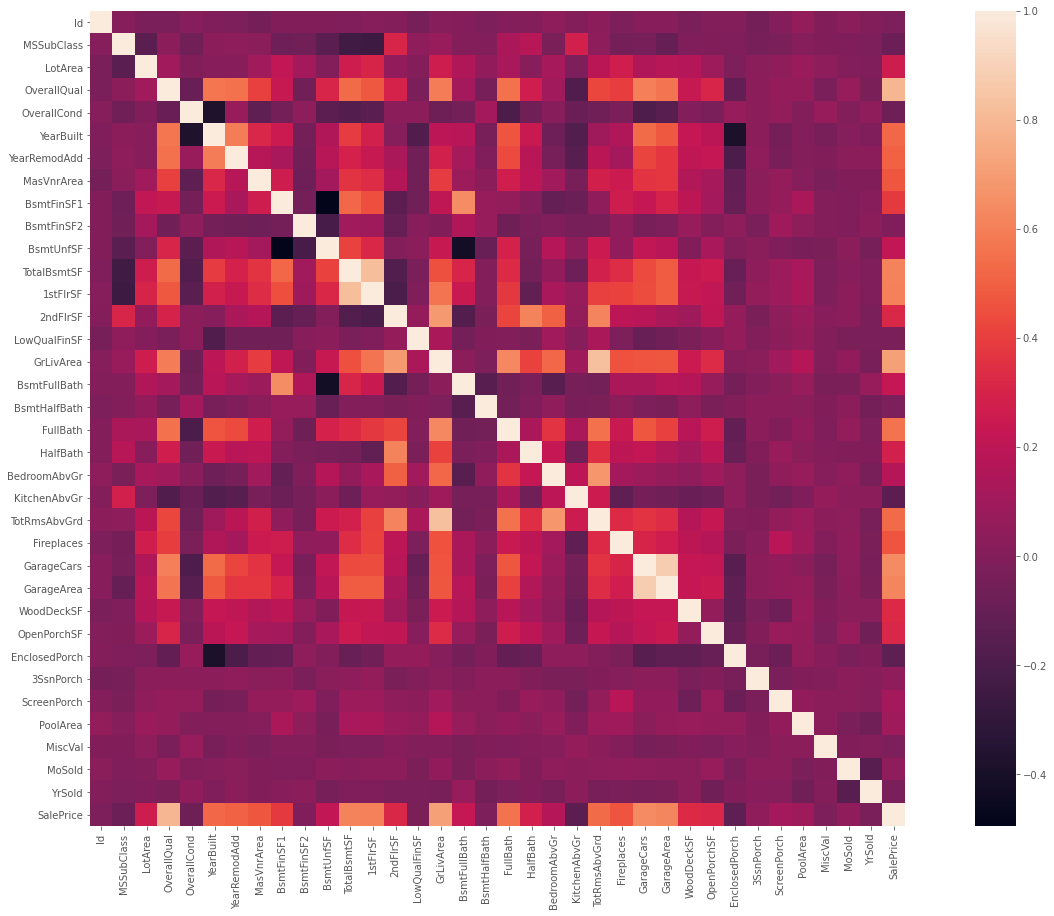

In [38]:
correlacion = TRAIN.corr();
fig, ax = plt.subplots(figsize=(25, 15));
sns.heatmap(correlacion, square=True);

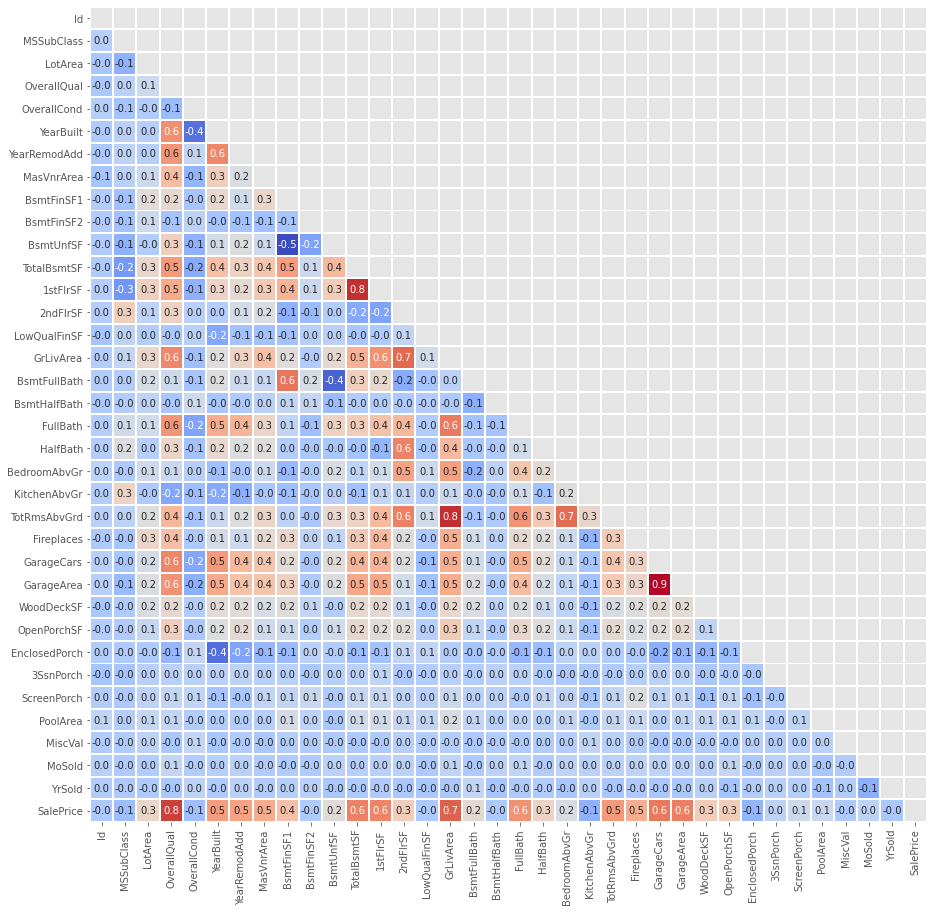

In [39]:
plt.figure(figsize=(15,15))

corrMatrix = TRAIN.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

### Grafico con distribucion de caracteristicas para analizar visualmente el comportamiento de cada componente

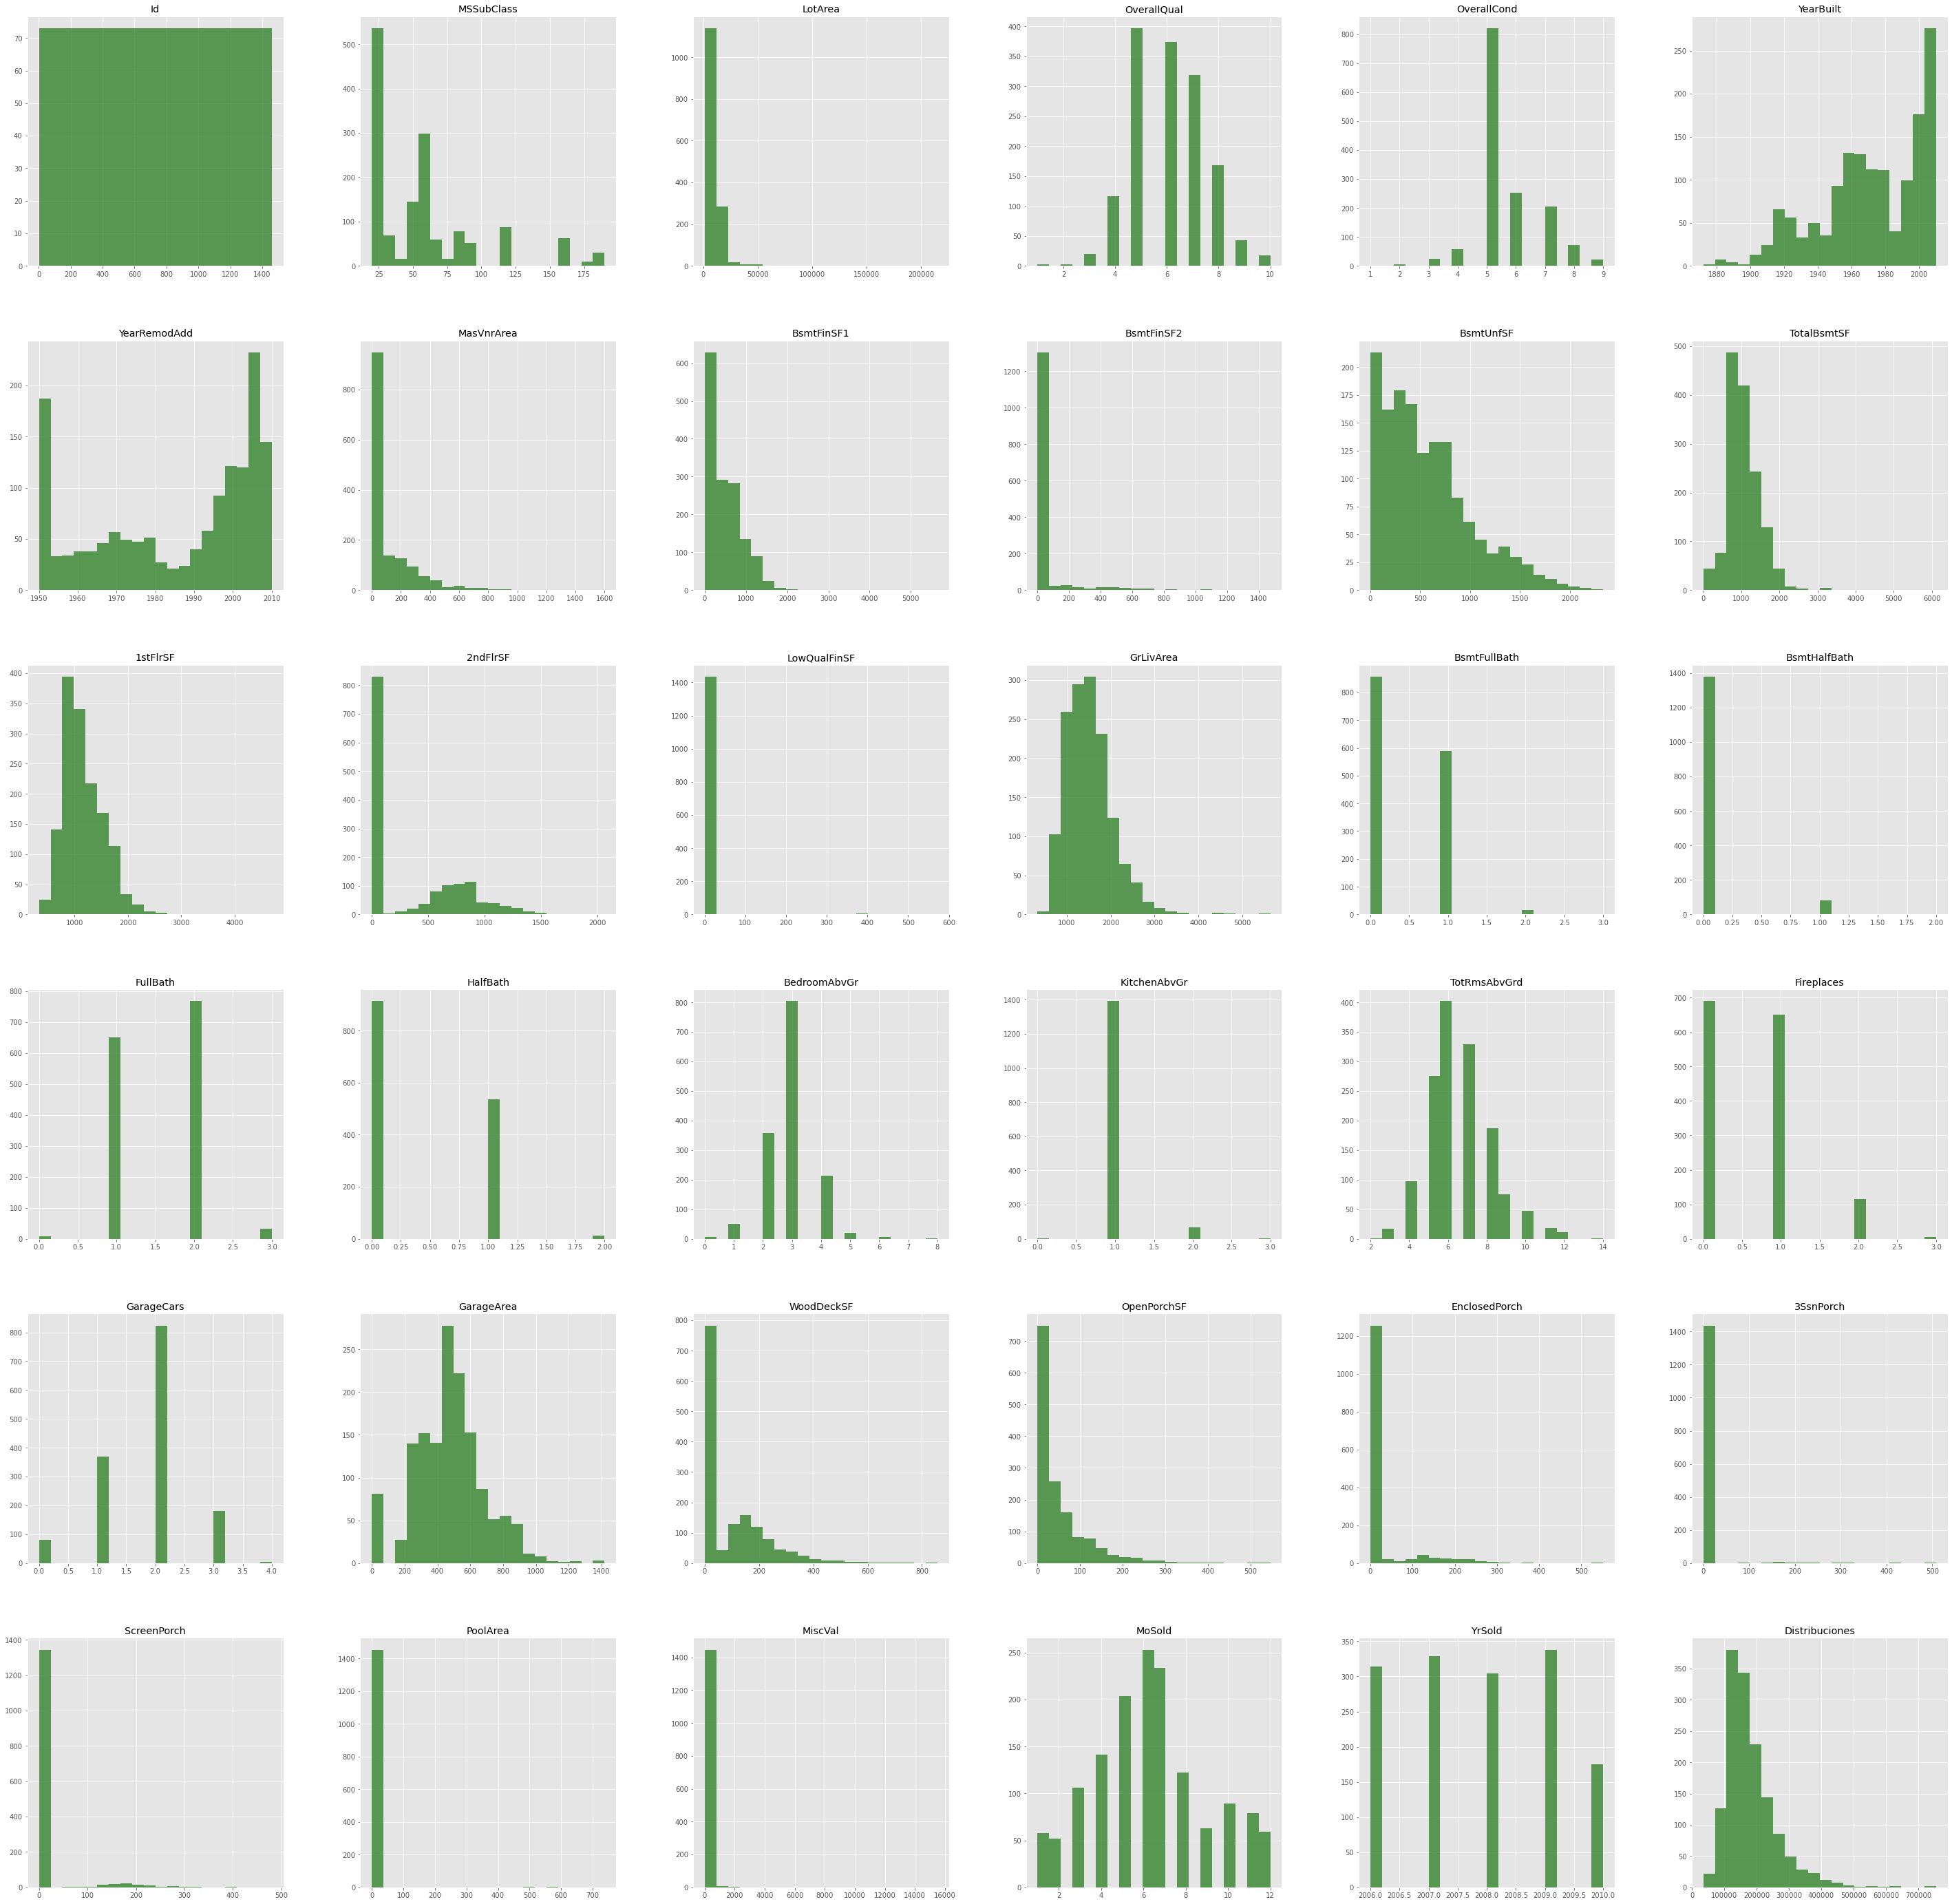

In [40]:
TRAIN.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Distribuciones")
plt.show()

## Analizando la Data con base en la columna "SalePrice"

Ya teniendo una idea de la correlacion y una exploracion general de la data, pasaremos a analizar el comportamiento de la columna "SalePrice",  la idea entonces es explorar este campo y compararlo con los demas para revisar su comportamiento y valores


Analizando el comportamiento del campo en graficas

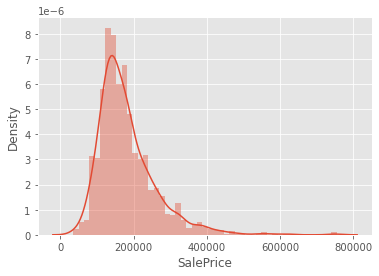

In [41]:
sns.distplot(TRAIN['SalePrice']);

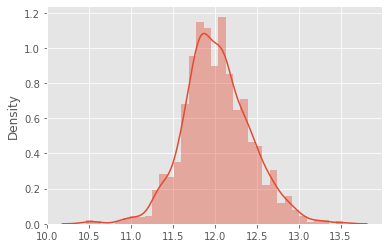

In [42]:
sns.distplot( np.log(TRAIN['SalePrice'].to_numpy()) );

Se genera la correlacion de los datos basado en la columna Sales Price, se observa una alta correlacion con a campos como 
- OverallQual     0.790982
- GrLivArea       0.708624
- GarageCars      0.640409
- GarageArea      0.623431
- TotalBsmtSF     0.613581
- 1stFlrSF        0.605852   

In [43]:
corrMatrix.loc['SalePrice'].sort_values(ascending=False)[:15]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
Name: SalePrice, dtype: float64

### Mostrando la correlacion de SalesPrice con los campos mas importantes

<AxesSubplot:>

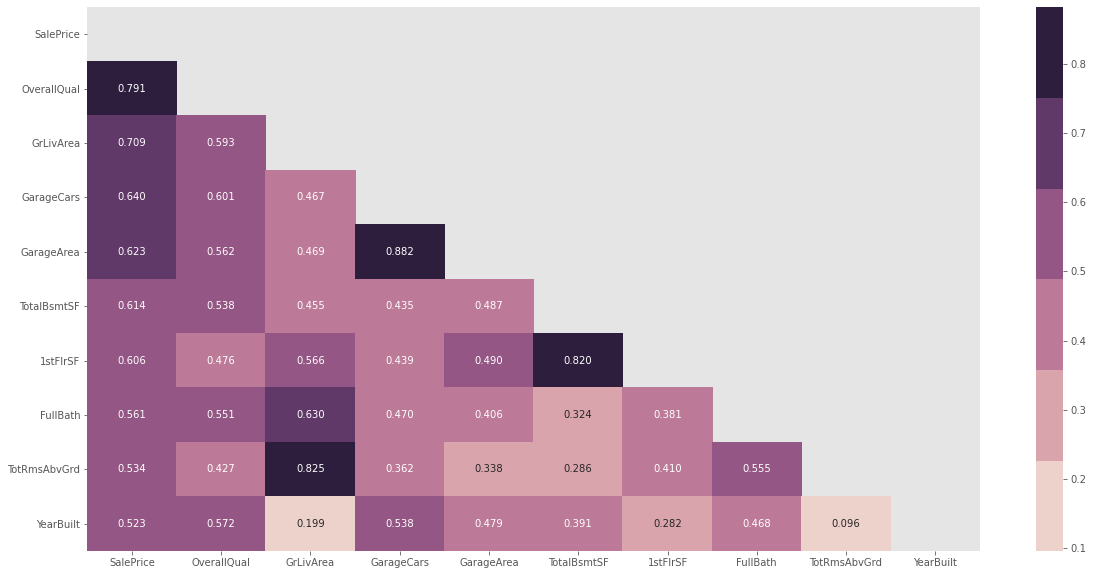

In [44]:
corr_feat = TRAIN.corr().nlargest(10,"SalePrice")["SalePrice"].index
cmap = np.corrcoef(TRAIN[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)

### Mostrando campos con mayor relevancia en orden descendente

In [45]:
corr_dict=corrMatrix['SalePrice'].sort_values(ascending=False).to_dict()

important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.8)) | (value<=-0.1):
        important_columns.append(key)

important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

### conociendo un poco mas de la data, y determinando cuales son los cmpos mas relevantes y ademas conociendo la definicion de los campos, se puede comenzar a explorar la informacion basado en el componente "Sales Price" 

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

Dentro de la data existen dos tipos de valores, valores numericos y categoricos,por lo que para visualizar el comportamiento de "Sales Price", se graficaran los valores con respecto a cada una de las columnas y asi identificar el comportamiento de los valores, primero con aquellos campos que son tienen mayor correlacion y luego con el resto.

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']


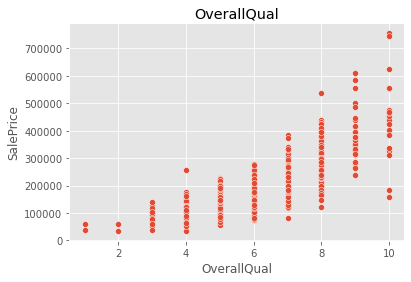

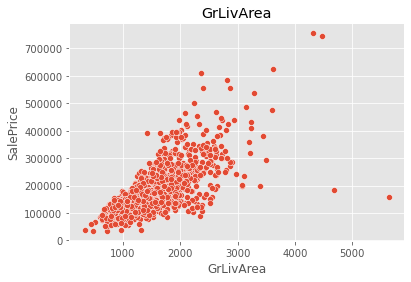

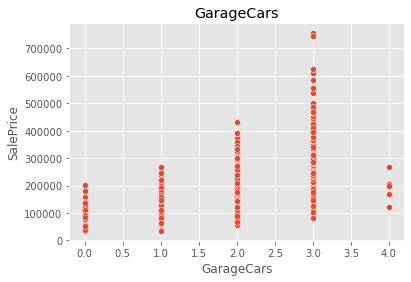

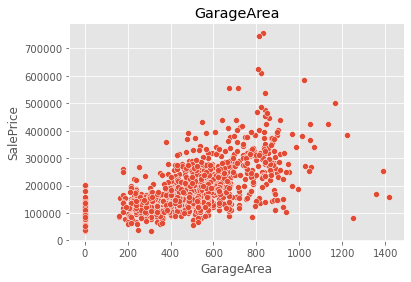

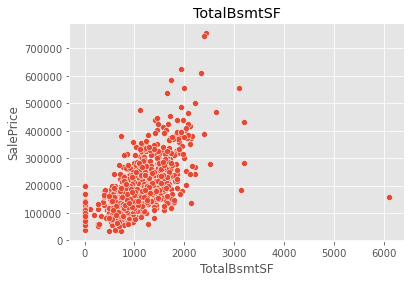

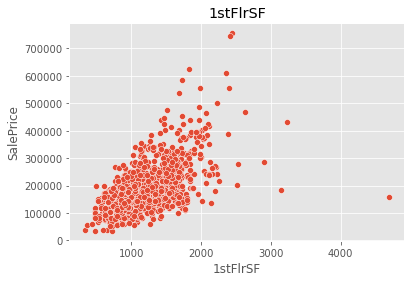

In [48]:
principales = ['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF']
print(principales)
for caracteristicas in principales:
    sns.scatterplot(x=caracteristicas,y="SalePrice",data=TRAIN)
    plt.title(caracteristicas)
    plt.show()




Los graficos anteriores nos dan una idea del comportamiento del precio de la casa basado en las variables mas importantes encontradas, por ejemplo:

Los valores de las casas dependen en gran medida del acabado y calidad de materiales (OverallQual), la grafica muestra la tendencia que a mayor calidad el precio tambien se incrementa.
Tambien la cantidad de terreno o are construida (GrLivArea) tiene un comportamiento similar al de OverallQuall.

En general, las variables escogidas como principales: 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',  'TotalBsmtSF',  '1stFlrSF' tienen garficas y comportamientos muy parecidos, a medida que aumentan los precios tambien aumenta en valor o en caracteristicas.


In [50]:
## Buscando variables con 8 o menos valores dintintos

discretas =[caracteristicas for caracteristicas in TRAIN if TRAIN[caracteristicas].nunique() < 8 and caracteristicas not in principales]
continuas = [caracteristicas for caracteristicas in TRAIN if caracteristicas not in discretas and caracteristicas not in principales]

print("Caracteristicas discretas:\n",discretas)
print("Caracteristicas Continuas:\n",continuas)

def scatterplot(df,feature,target_feature):
    plt.figure(constrained_layout=True)
    sns.scatterplot(df[feature],df[target_feature])
    plt.title(feature)
    plt.show()


Caracteristicas discretas:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'PavedDrive', 'YrSold', 'SaleCondition']
Caracteristicas Continuas:
 ['Id', 'MSSubClass', 'LotArea', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SalePrice']


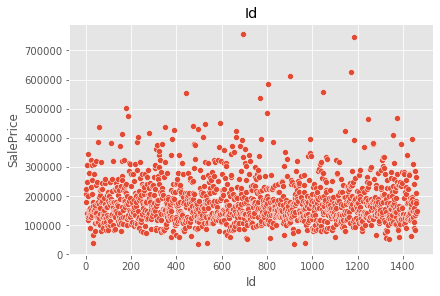

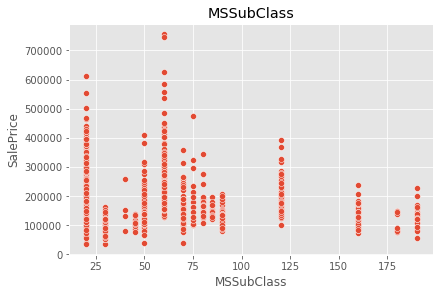

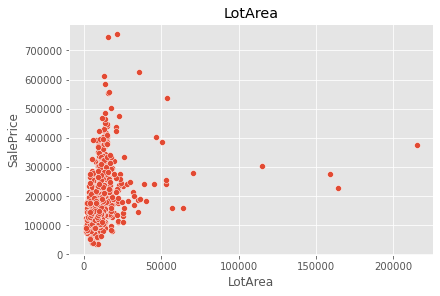

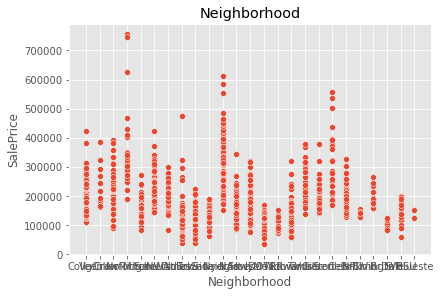

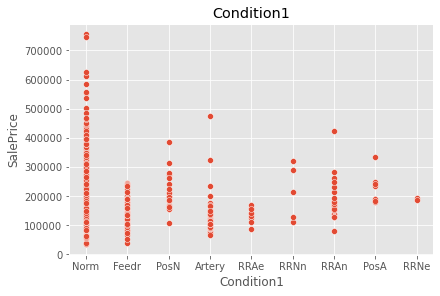

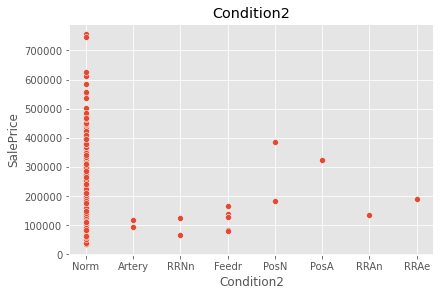

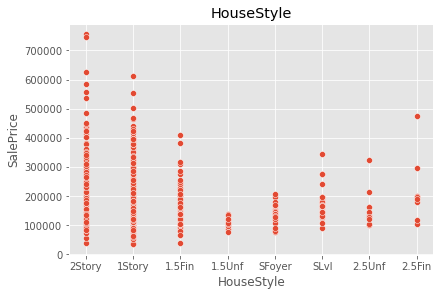

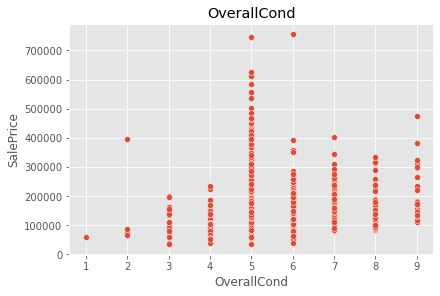

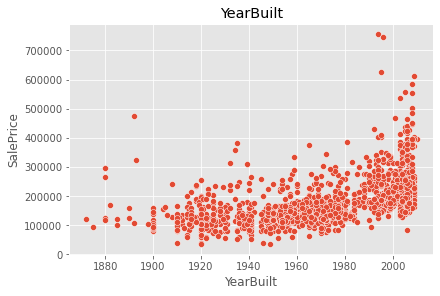

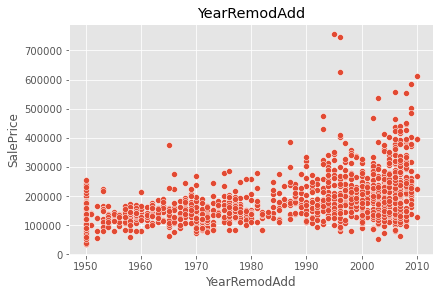

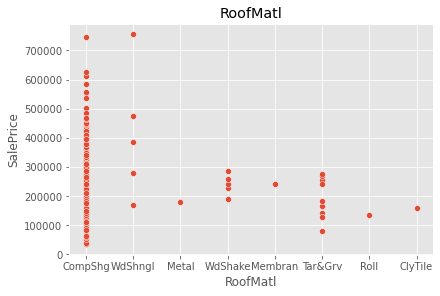

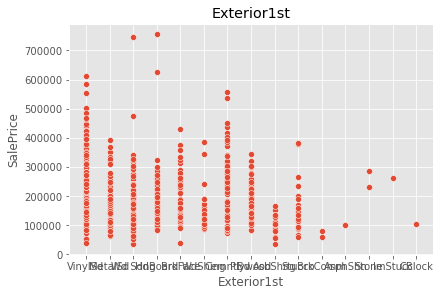

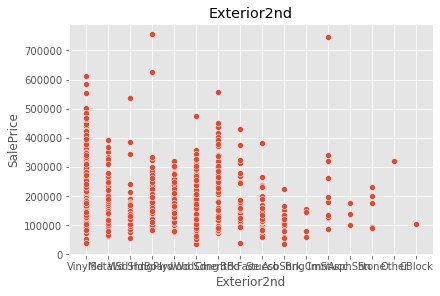

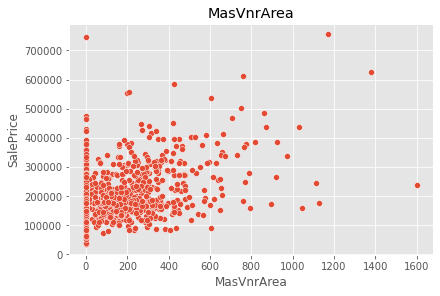

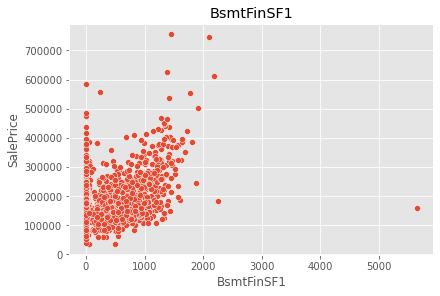

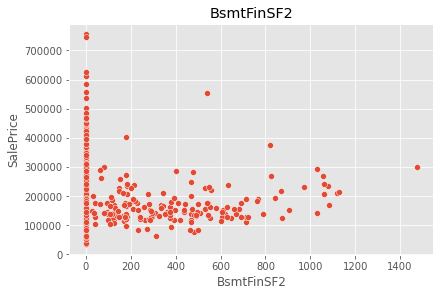

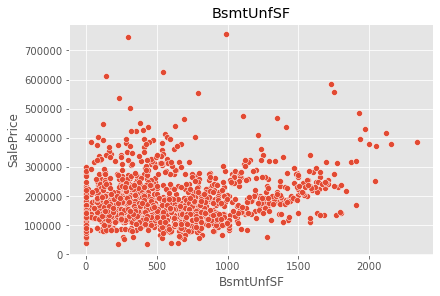

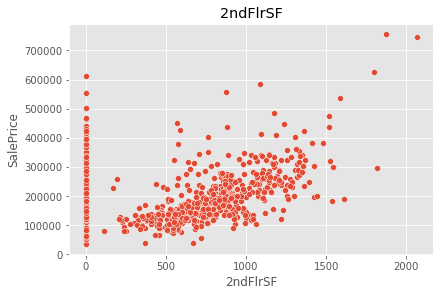

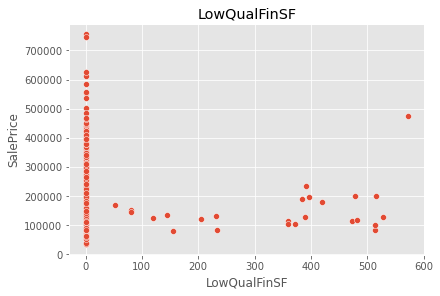

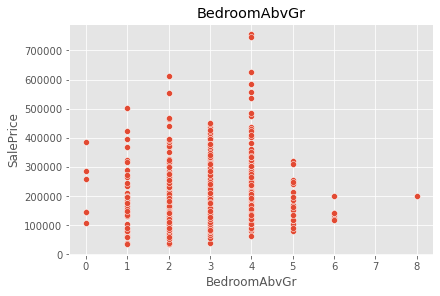

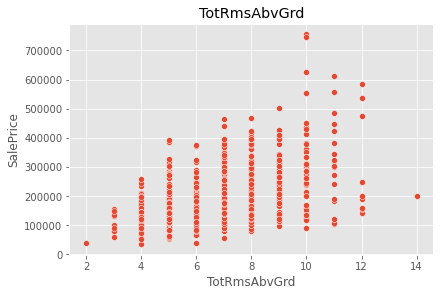

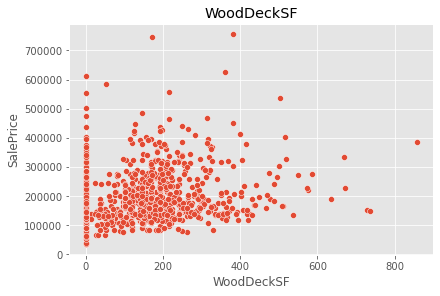

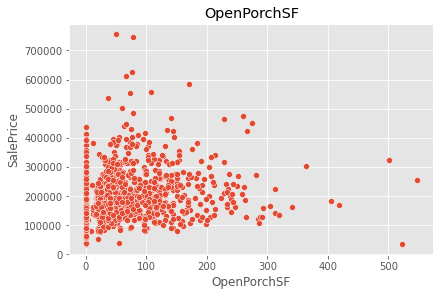

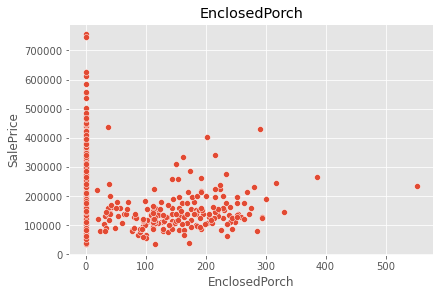

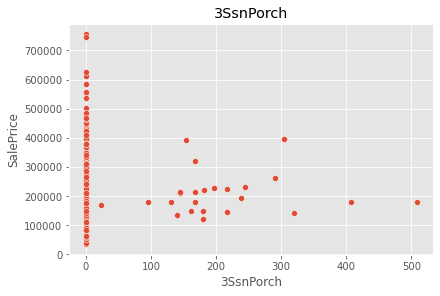

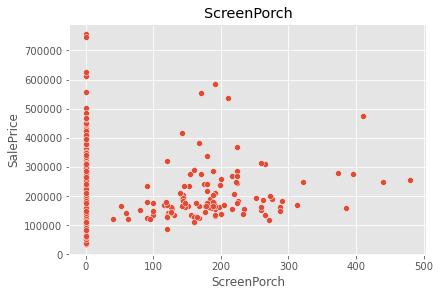

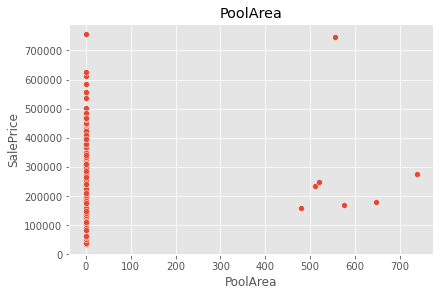

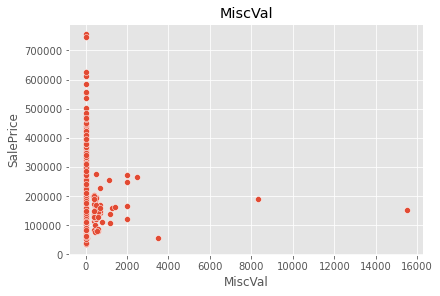

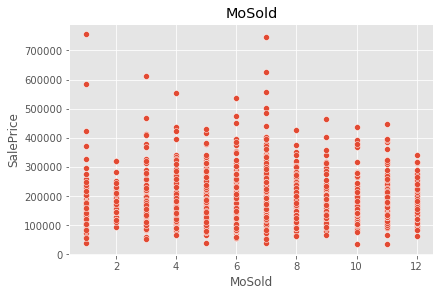

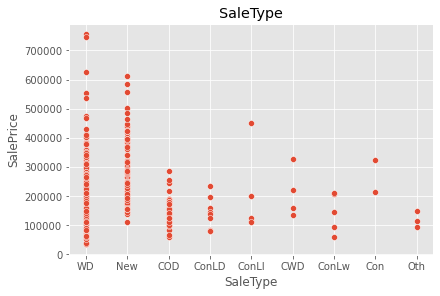

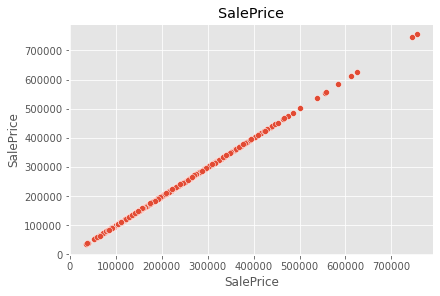

In [51]:
for feat in continuas:
    scatterplot(TRAIN,feat,"SalePrice")

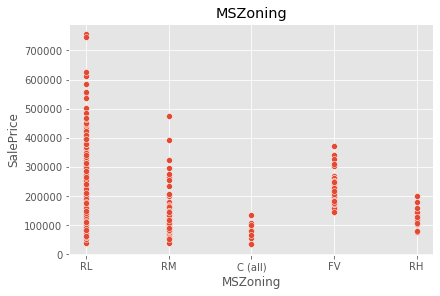

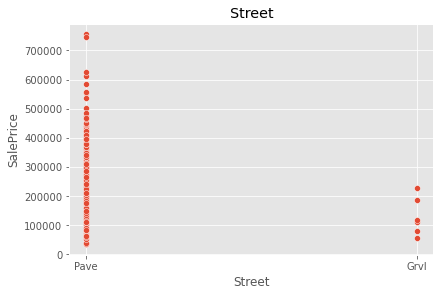

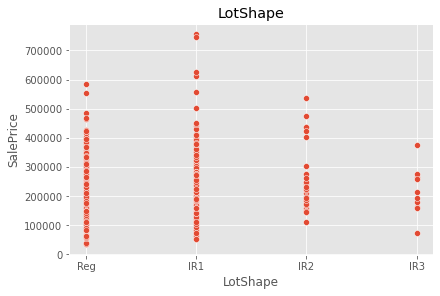

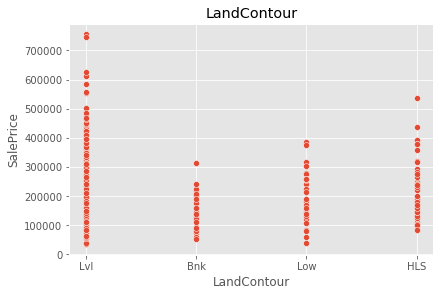

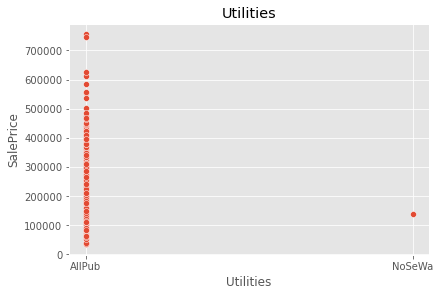

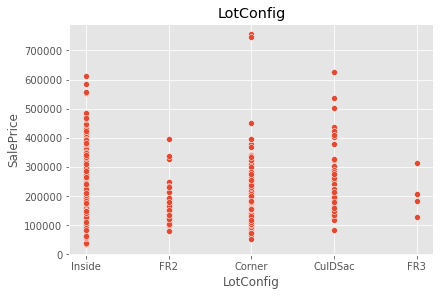

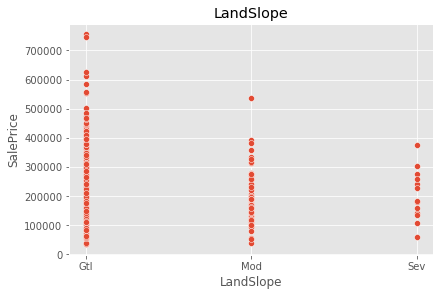

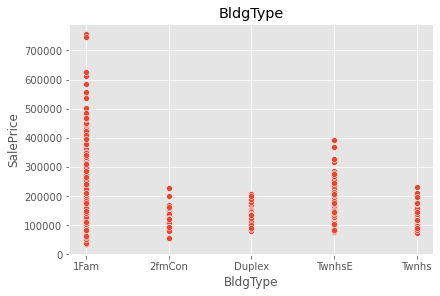

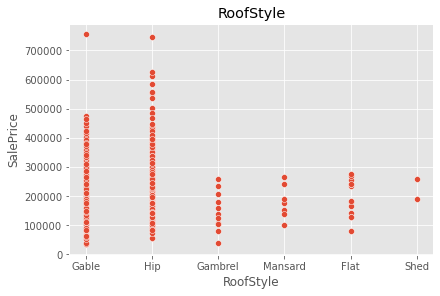

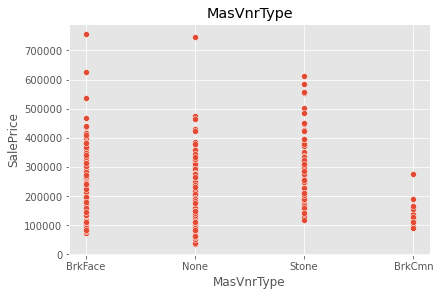

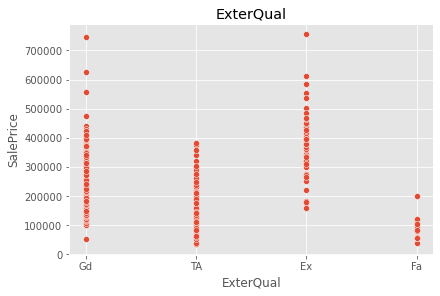

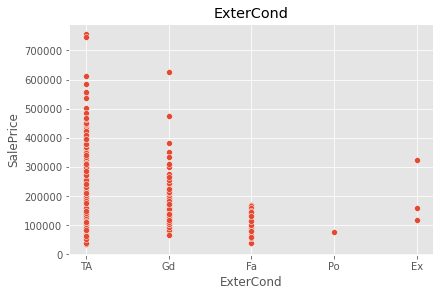

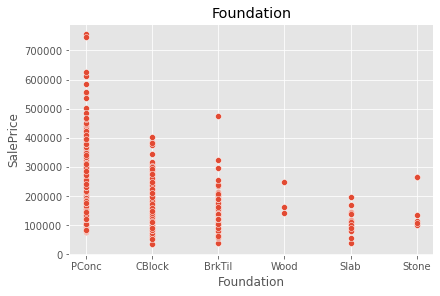

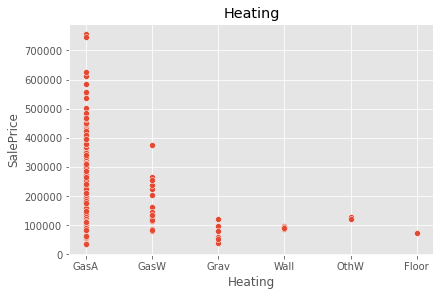

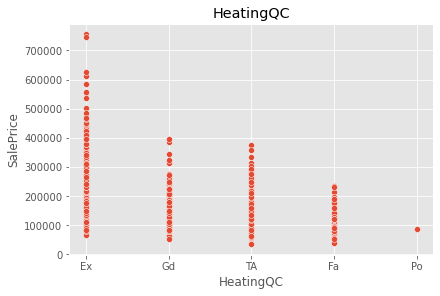

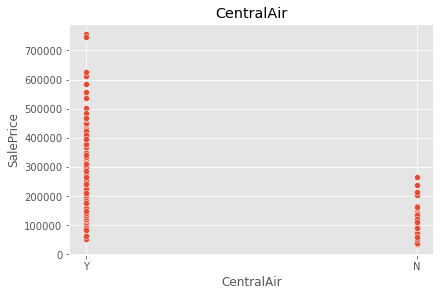

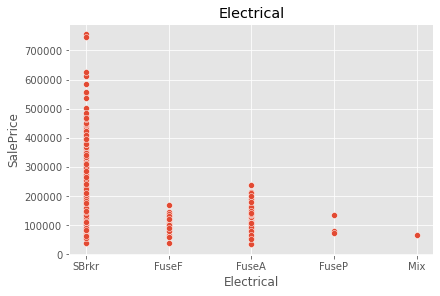

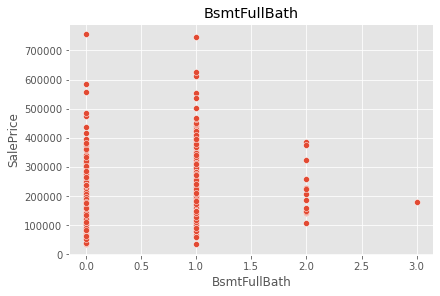

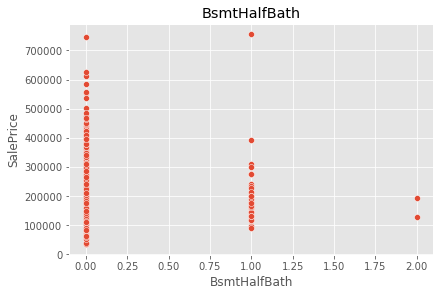

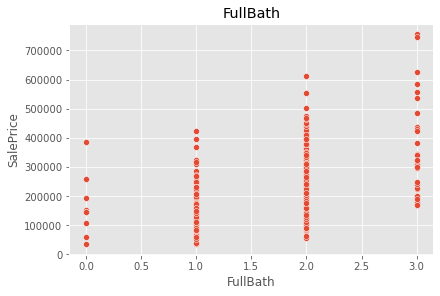

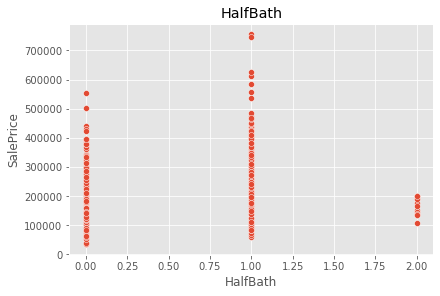

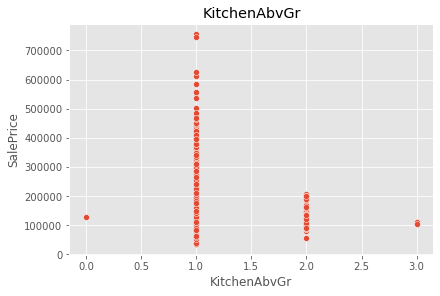

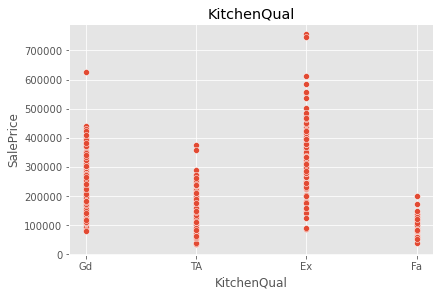

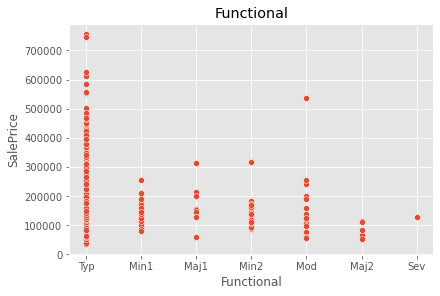

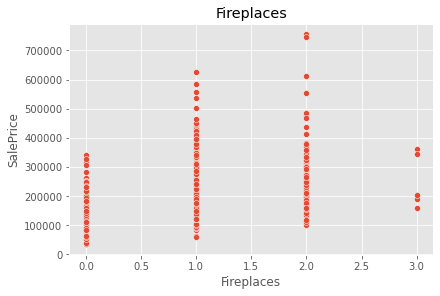

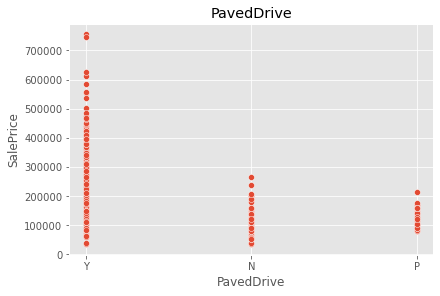

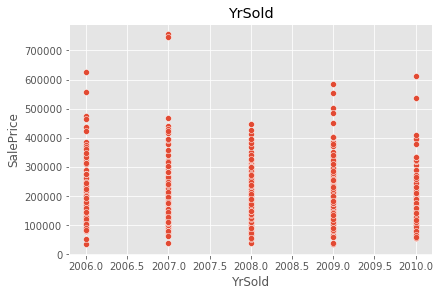

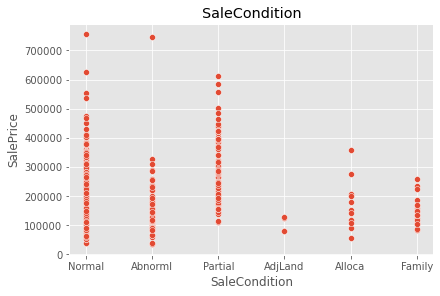

In [52]:
for feat in discretas:
    scatterplot(TRAIN,feat,"SalePrice")

In [53]:
TRAIN.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
